In [1]:
import pandas as pd
import numpy as np
import sqlite3 
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats


In [2]:
ConnectiontoDF = sqlite3.connect("im.db") 
cur = ConnectiontoDF.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()


In [3]:
Whatisinhere1 = """
SELECT *
FROM movie_basics
LIMIT 5
;
"""

movie_basics_table = pd.read_sql(Whatisinhere1, ConnectiontoDF)
dz = movie_basics_table.drop('genres', axis=1).join(movie_basics_table['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres '))
dz = dz.drop_duplicates()
dz.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama


In [5]:
df= pd.read_csv("bom.movie_gross.csv.gz", index_col=False)
df["foreign_gross"] = pd.to_numeric(df["foreign_gross"], errors='coerce')
df["foreign_gross"].fillna(0)
df["total"] = df["foreign_gross"] + df["domestic_gross"].fillna(0)
df.sort_values(by=["total"], inplace = True, ascending = False)
df.head()
df = df.rename(columns ={"title": "movie"})
df.head()

,movie,studio,domestic_gross,foreign_gross,year,total
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09


In [15]:
dz = dz.rename(columns = {"primary_title": "movie"})



<bound method DataFrame.info of     movie_id                            movie              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
0  tt0063540                        Sunghursh                   Sunghursh   
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes    genres   

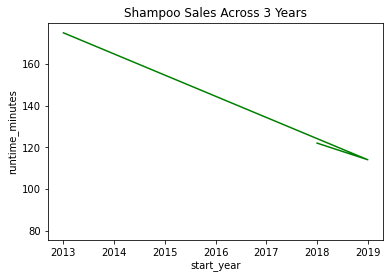

In [17]:
fig, ax = plt.subplots()
ax.plot(dz['start_year'],
         dz['runtime_minutes'],
         color='g')
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('start_year')
ax.set_ylabel('runtime_minutes');

In [63]:
ConnectiontoDF = sqlite3.connect("im.db") 
cur = ConnectiontoDF.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [64]:
movie_basics_table = pd.read_sql(Whatisinhere1, ConnectiontoDF)

In [69]:
movie_basics_table.head()
movie_basics_table = movie_basics_table.rename(columns = {"primary_title": "movie"})

In [74]:
mergeplease = dz.merge(movie_basics_table, on="movie").merge(df, on="movie")
mergeplease.head()


,movie_id_x,movie,original_title_x,start_year_x,runtime_minutes_x,genres,movie_id_y,original_title_y,start_year_y,runtime_minutes_y,genres,studio,domestic_gross,foreign_gross,year,total
